# Подготовка к работе

In [1]:
#Импорт биюлилиотек
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Graphics in SVG format are more sharp and legible
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

In [2]:
# Подготавливаем общие настройки для графиков

sns.set(
    rc={
        "figure.figsize": (12, 8), #размер графика - 12 дюймов в ширину, 8 в длину
        "axes.titlesize": 20, #размер заголовка 
        "axes.labelsize": 14, #размер подписей осей
        "xtick.labelsize": 13, #размер подписей чёрточек на x-оси
        "ytick.labelsize": 13, #размер подписей чёрточек на y-оси
    }
)

sns.set_style("whitegrid") #тема фона, белая со штриховкой

## Загрузка данных

In [3]:
os.listdir(os.getcwd())

['les_5_hw_2.ipynb',
 '.DS_Store',
 'dop_hw',
 'les_5_hw_1.ipynb',
 'les_5_hw_3.ipynb',
 'transaction_data_updated.csv',
 '.ipynb_checkpoints',
 '5_data.csv.zip',
 'transaction_data.csv']

In [4]:
df = pd.read_csv('transaction_data.csv')

## Изучение данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [6]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [7]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [8]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [9]:
#Пририводим объект к дате
df.date = pd.to_datetime(df.date)
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

date - дата транзакции  
name - имя совершившенго транзакцию  
s - статус транзакции

In [10]:
#Пропущенныне значения
df.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [11]:
succes_transaction = df.query('transaction == "successfull"')\
                                        .groupby('name', as_index=False)\
                                        .agg({'date' : 'count'})\
                                        .sort_values('date', ascending=False)

cancel__transaction = df.query('transaction == "cancelled"')\
                                        .groupby('name', as_index=False)\
                                        .agg({'date' : 'count'})\
                                        .sort_values('date', ascending=False)

In [12]:
round(succes_transaction.date.mean())

66

In [13]:
round(succes_transaction.date.max())

82

In [14]:
succes_transaction.describe()

,date
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


<AxesSubplot:>

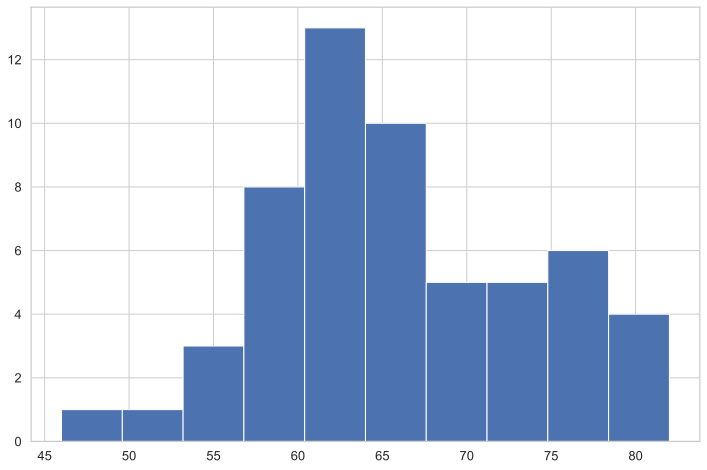

In [15]:
succes_transaction.date.hist()


<AxesSubplot:>

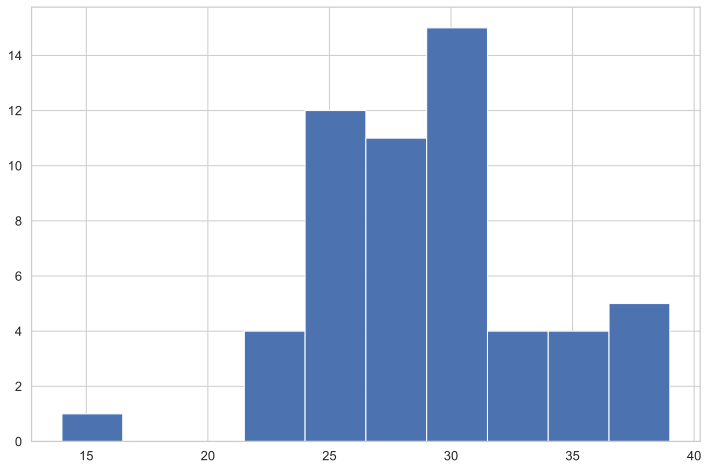

In [16]:
cancel__transaction.date.hist()

In [17]:
transaction_type = df.groupby('transaction', as_index=False).agg({'date':'count'}).sort_values('date', ascending = False)
transaction_type

,transaction,date
2,successfull,3692
0,cancelled,1619
1,error,4


<AxesSubplot:xlabel='transaction', ylabel='date'>

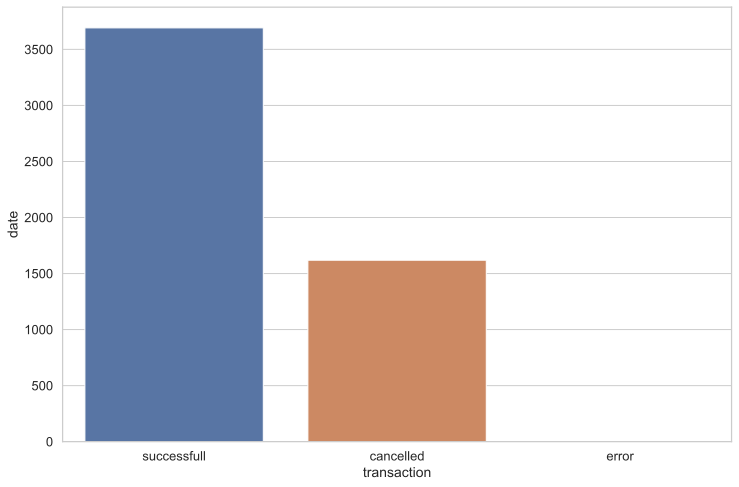

In [18]:
sns.barplot(x= 'transaction',  y = 'date' ,  data = transaction_type)

## Загрузка данных

In [19]:
os.listdir(os.getcwd())

['les_5_hw_2.ipynb',
 '.DS_Store',
 'dop_hw',
 'les_5_hw_1.ipynb',
 'les_5_hw_3.ipynb',
 'transaction_data_updated.csv',
 '.ipynb_checkpoints',
 '5_data.csv.zip',
 'transaction_data.csv']

In [20]:
df2 = pd.read_csv('transaction_data_updated.csv')

## Изучение данных

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
 3   minute       5315 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 166.2+ KB


In [22]:
df2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


minute - прошло минут с начала дня

In [23]:
# Приводим объект к дате
df2.date = pd.to_datetime(df2.date)

In [24]:
df2.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [25]:
transaction_by_name_minute = df2.groupby(['name', 'minute'], as_index=False)\
                                    .agg({'transaction' : 'count'})\
                                    .rename(columns = {'transaction' : 'transaction_count'})

In [26]:
user_vs_minute_pivot = transaction_by_name_minute.pivot(index='minute', columns='name', values='transaction_count').fillna(0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [27]:
df2['true_minute'] = df2.date.dt.minute + df2.date.dt.hour * 60

In [28]:
df2.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [29]:
transaction_by_name_minute = df2.groupby(['name', 'true_minute'], as_index=False)\
                                    .agg({'transaction' : 'count'})\
                                    .rename(columns = {'transaction' : 'transaction_count'})
transaction_by_name_minute

,name,true_minute,transaction_count
0,Ekaterina_Fedorova,0,1
1,Ekaterina_Fedorova,1,1
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,2
4,Ekaterina_Fedorova,4,2
...,...,...,...
3306,Vasilisa_Smirnova,82,2
3307,Vasilisa_Smirnova,85,1
3308,Vasilisa_Smirnova,86,1
3309,Vasilisa_Smirnova,87,2


<AxesSubplot:xlabel='true_minute', ylabel='transaction_count'>

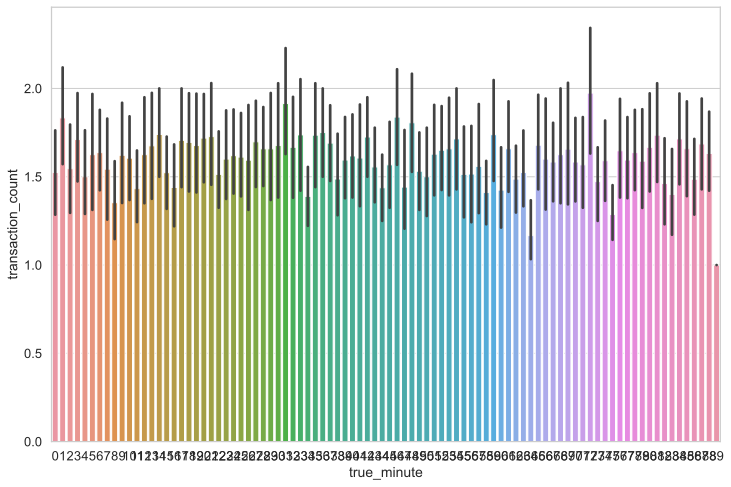

In [30]:
sns.barplot( x= 'true_minute', y = 'transaction_count', data=transaction_by_name_minute)